Name: Kaushal Kothiya

Roll No.- 21110107

# Prerequsite test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Q1
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

dimentions of resultant matrix = (n,m)

for each element in the resultant matrix we perform k multiplications and there are total n*m elements in resultant matrix.

Total no. of multiplications= n*m*k

for each element in the resultant matrix we perform k-1 additions and there are total n*m elements in resultant matrix.

Total no. of additions= n*m*(k-1)


Q2 Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?



In [2]:
import numpy as np
import time

n=50
k=100
m=50
A=[]
B=[]
C=[]
for i in range (n):
    list=[]
    for j in range (k):
        list.append(i+j)
    A.append(list)

for i in range (k):
    list=[]
    for j in range (m):
        list.append(i+j)
    B.append(list)

for i in range (n):
    list=[]
    for j in range (m):
        list.append(0)
    C.append(list)


start = time.time()
for i in range (n):
    for j in range(m):
        for x in range (k):
            C[i][j]+=A[i][x]*B[x][j]

end = time.time()
print("time taken using list of list: ", end - start)
start = time.time()
D=np.matmul(A,B)
# print(C)
# print(D)
end = time.time()
print("time taken using numpy: ", end - start)


time taken using list of list:  0.25033044815063477
time taken using numpy:  0.003021717071533203


Matrix multiplication using numpy is faster the using for loop. Numpy uses BLAS and LAPACK libraries to execute linear algebra functions with matrices, vectors efficiently, allowing numpy to make the best use of system hardware. 

Q3 Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?



Using the first method time complexity of finding the median will be $ \mathcal{O}(n^2) $.

a better method would be to sort the array and find the middle element as it would take  $ \mathcal{O}(n*log(n)) $ time

In [3]:
import numpy as np
def f1(arr):
    n=len(arr)
    if(len(arr)%2==1):
        for i in range (n//2):
            m=arr[0]
            mi=0
            for j in range(len(arr)):
                if(arr[j]<m):
                    m=arr[j]
                    mi=j
            arr.remove(m)
        m=arr[0]
        mi=0
        for j in range(len(arr)):
            if(arr[j]<m):
                m=arr[j]
                mi=j
        return m
    else:
        for i in range ((n//2)-1):
            m=arr[0]
            mi=0
            for j in range(len(arr)):
                if(arr[j]<m):
                    m=arr[j]
                    mi=j
            arr.remove(m)
        m1=arr[0]
        m2=arr[1]
        for j in range(2,len(arr)):
            if(arr[j]<m1):
                m2=m1
                m1=arr[j]
            elif(arr[j]<m2):
                m2=arr[j]
        return (m1+m2)/2
        


def f2(arr):
    n=len(arr)
    arr.sort()
    if n%2==0:
        return (arr[n//2]+arr[(n//2)-1])/2
    else:
        return arr[n//2]


l=[1,2,3]
l2=[1,2,3]
l3=[1,2,3]
for i in range(1021):
    l.append(2000-i)
    l2.append(2000-i)
    l3.append(2000-i)
start = time.time()
a=f1(l)

end = time.time()
print(a)
print("elapsed time: ", end - start)
# print(l2)
start = time.time()

b=f2(l2)
print(b)
end = time.time()
print("elapsed time: ", end - start)

start = time.time()
c=np.median(l3)
print(c)
end = time.time()
print("elapsed time: ", end - start)


1488.5
elapsed time:  0.14087796211242676
1488.5
elapsed time:  0.0009946823120117188
1488.5
elapsed time:  0.0


Q4 What is the gradient of the following function with respect to x and y?

$x^2y + y^3\sin(x)$

gradient wrt x: $2xy + y^3\cos(x)$

gradient wrt y: $x^2 + 3y^2\sin(x)$

Q5 Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [4]:
import jax
import jax.numpy as jnp

def func(x,y):
    return (x**2)*y+(y**3)*(jnp.sin(x))

grad_func=jax.grad(func,argnums=(0,1))

rx = np.random.rand()
ry = np.random.rand()
print("x", rx )
print("y", ry)
grad_x = 2 * rx * ry + ry**3 * np.cos(rx)
grad_y = rx**2 + 3 * ry**2 * np.sin(rx)

jax_grad_x, jax_grad_y = grad_func(rx, ry)

# Print the results
print("Gradient with respect to x:", grad_x)
print("JAX Gradient with respect to x:", jax_grad_x)

print("Gradient with respect to y:", grad_y)
print("JAX Gradient with respect to y:", jax_grad_y)
print()



x 0.46724924461531403
y 0.28227007647983404
Gradient with respect to x: 0.28386050679519836
JAX Gradient with respect to x: 0.2838605
Gradient with respect to y: 0.325988273127909
JAX Gradient with respect to y: 0.3259883



Q6 Use sympy to confirm that you obtain the same gradient analytically

In [5]:
from sympy import *

x, y = symbols('x y')

f = (x**2)*y+(y**3)*(sin(x))

df_dx = diff(f, x)
df_dy = diff(f, y)

print(f"Gradient with respect to x: {df_dx}")
print(f"Gradient with respect to y: {df_dy}")


#analytically calculated gradients
grad_x = "2 * x * y + y**3 * np.cos(x)"
grad_y = "x**2 + 3 * y**2 * np.sin(x)"


Gradient with respect to x: 2*x*y + y**3*cos(x)
Gradient with respect to y: x**2 + 3*y**2*sin(x)


Q7

In [6]:
dic={2022:{
"Branch 1":{
    "student1":{
    "Roll Number": 107, 
    "Name": "Kaushal",
    "Marks":{
        "Maths": 100, 
        "English": 70
    }
    }
},
"Branch 2": {
    "student1":{
    "Roll Number": 17, 
    "Name": "kk",
    "Marks":{
        "Maths": 10, 
        "English": 70
    }
    }
},
2023:{
"Branch 1" : {},
"Branch 2" : {}
},
2024 :{
"Branch 1" : {},
"Branch 2" : {}
},
2025:{
"Branch 1" : {},
"Branch 2" : {}
}
}
}
dic


{2022: {'Branch 1': {'student1': {'Roll Number': 107,
    'Name': 'Kaushal',
    'Marks': {'Maths': 100, 'English': 70}}},
  'Branch 2': {'student1': {'Roll Number': 17,
    'Name': 'kk',
    'Marks': {'Maths': 10, 'English': 70}}},
  2023: {'Branch 1': {}, 'Branch 2': {}},
  2024: {'Branch 1': {}, 'Branch 2': {}},
  2025: {'Branch 1': {}, 'Branch 2': {}}}}

Q8 Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.



In [7]:
class Student:
    def __init__(self,Name,Roll_number,Marks):
        self.Name=Name
        self.Roll_number=Roll_number
        self.Marks=Marks
class Branch:
    def __init__(self,branch,students):
        self.students=students
        self.branch=branch
class Year:
    def __init__(self,year,branch):
        self.branches=branch
        self.year=year

       

database = []
stud1 = Student("Kaushal",107,{"Maths": 100, "English": 70})
stud2 = Student("Kk",17,{"Maths": 00, "English": 70})
stud3 = Student("Kaushal1",111,{"Maths": 30, "English": 70})
stud4 = Student("Kkkk",17,{"Maths": 100, "English": 70})
branch1 = Branch("Branch 1", [stud1,stud2])
branch2 = Branch("Branch 1", [stud3,stud4])
year1 = Year("2022",[branch1,])
year2 = Year("2023",[branch2,])
database.append(year1)
database.append(year2)

for years in database:
    print(years.year)
    for branch in years.branches:
        print("\t",branch.branch)
        for student in branch.students:
            print("\t\t",student.Name)
            print("\t\t",student.Roll_number)
            print("\t\t",student.Marks)



2022
	 Branch 1
		 Kaushal
		 107
		 {'Maths': 100, 'English': 70}
		 Kk
		 17
		 {'Maths': 0, 'English': 70}
2023
	 Branch 1
		 Kaushal1
		 111
		 {'Maths': 30, 'English': 70}
		 Kkkk
		 17
		 {'Maths': 100, 'English': 70}


Q9

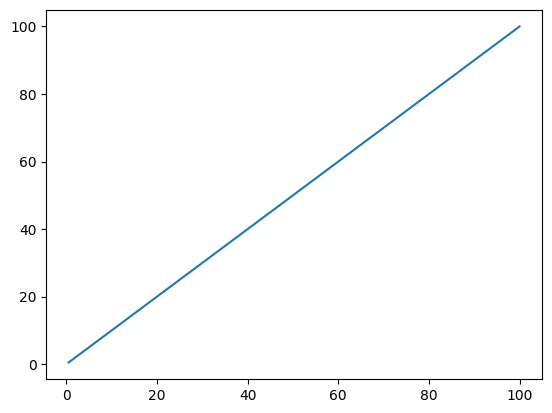

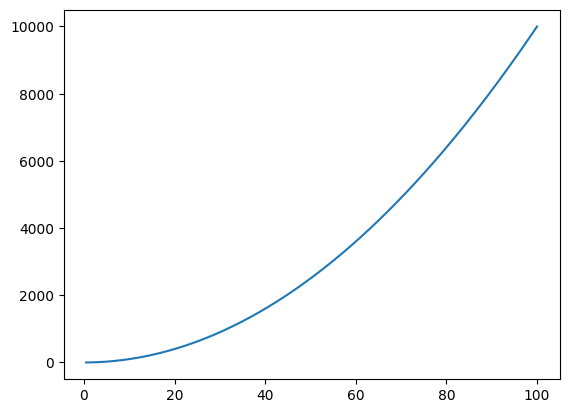

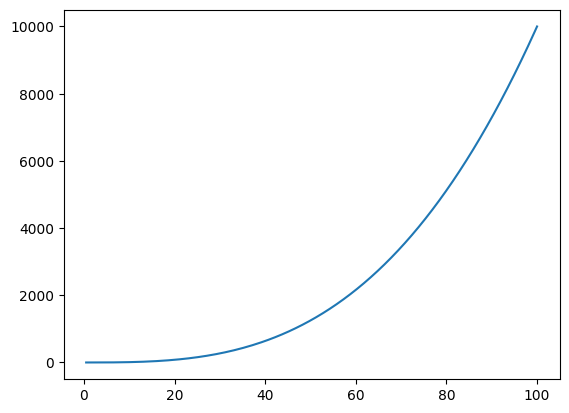

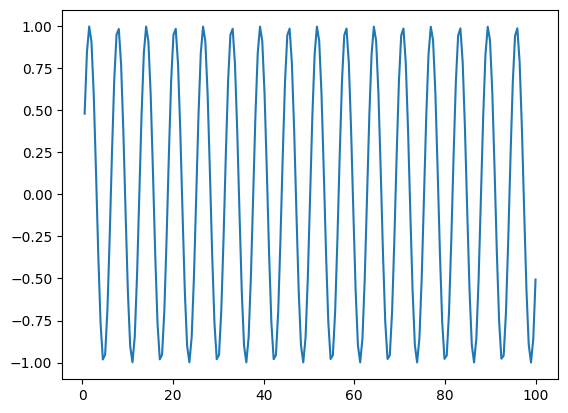

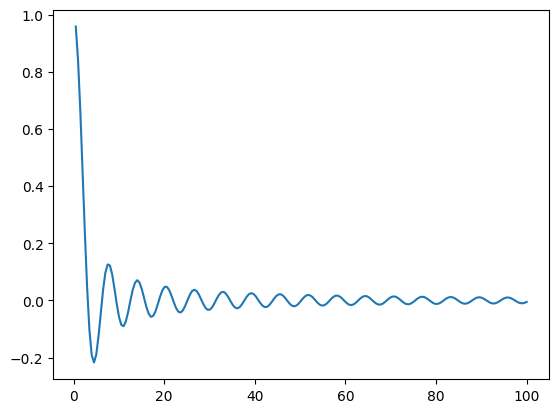

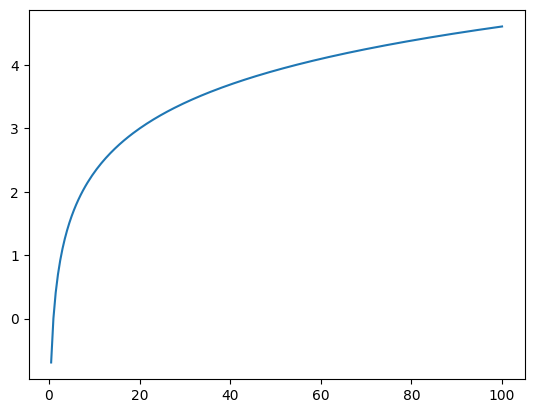

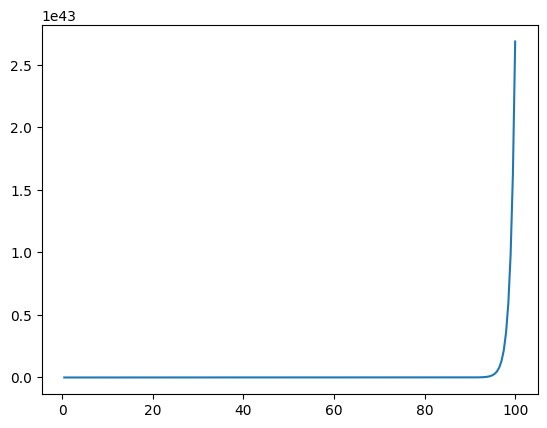

In [8]:

def f1(x):
    return x
def f2(x):
    return x**2
def f3(x):
    return (x**3)/100
def f4(x):
    return np.sin(x)
def f5(x):
    return np.sin(x)/x
def f6(x):
    return np.log(x)
def f7(x):
    return np.exp(x)

x_points=np.linspace(0.5,100,199)
plt.plot(x_points, f1(x_points))
plt.show()
plt.plot(x_points, f2(x_points))
plt.show()
plt.plot(x_points, f3(x_points))
plt.show()
plt.plot(x_points, f4(x_points))
plt.show()
plt.plot(x_points, f5(x_points))
plt.show()
plt.plot(x_points, f6(x_points))
plt.show()
plt.plot(x_points, f7(x_points))
plt.show()



Q10 Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [9]:

matrix = np.random.uniform(1, 2, size=(20, 5))
dataset = pd.DataFrame({'a': matrix[:, 0], 'b': matrix[:, 1], 'c': matrix[:, 2], 'd': matrix[:, 3], 'e': matrix[:, 4]})

print(dataset)

std_dev=dataset.std(axis=0)
col_with_highest_stddev = std_dev.idxmax()
# print(std_dev)
print("col index with highest std dev: ",col_with_highest_stddev)

meann=dataset.mean(axis=1)
row_with_highest_mean = meann.idxmin()
# print(meann)
print("row index with min mean: ",row_with_highest_mean)


           a         b         c         d         e
0   1.208607  1.575759  1.139459  1.749384  1.387581
1   1.010392  1.655829  1.366592  1.469150  1.518161
2   1.550835  1.325316  1.731989  1.046981  1.241461
3   1.816244  1.870420  1.538215  1.025446  1.790254
4   1.466118  1.381038  1.076809  1.095432  1.290850
5   1.580116  1.404194  1.142246  1.794673  1.439336
6   1.169454  1.311653  1.008862  1.811882  1.708771
7   1.931437  1.386374  1.926659  1.207050  1.148591
8   1.532010  1.614660  1.878191  1.276235  1.694099
9   1.132101  1.064478  1.001534  1.043609  1.635564
10  1.467823  1.258119  1.020171  1.220973  1.719173
11  1.567224  1.311656  1.335997  1.607467  1.059382
12  1.374901  1.619633  1.265740  1.037278  1.597886
13  1.400315  1.081398  1.593521  1.642096  1.773596
14  1.709500  1.959734  1.311830  1.877255  1.433770
15  1.754012  1.504569  1.586304  1.806034  1.162511
16  1.101851  1.437586  1.729558  1.958301  1.794656
17  1.615824  1.631176  1.243055  1.825115  1.

Q11 Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.



In [10]:
dataset['f'] = dataset[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
dataset['g'] = dataset[['f']]
for i in range(len(dataset['g'])):
    if dataset['g'][i]<8:
        dataset['g'][i]="LT8"
    else:
        dataset['g'][i]="GT8"
dataset

,a,b,c,d,e,f,g
0,1.208607,1.575759,1.139459,1.749384,1.387581,7.060790,LT8
1,1.010392,1.655829,1.366592,1.469150,1.518161,7.020124,LT8
2,1.550835,1.325316,1.731989,1.046981,1.241461,6.896582,LT8
3,1.816244,1.870420,1.538215,1.025446,1.790254,8.040579,GT8
4,1.466118,1.381038,1.076809,1.095432,1.290850,6.310247,LT8
5,1.580116,1.404194,1.142246,1.794673,1.439336,7.360564,LT8
6,1.169454,1.311653,1.008862,1.811882,1.708771,7.010623,LT8
7,1.931437,1.386374,1.926659,1.207050,1.148591,7.600111,LT8
8,1.532010,1.614660,1.878191,1.276235,1.694099,7.995195,LT8
9,1.132101,1.064478,1.001534,1.043609,1.635564,5.877286,LT8


Q12 Write a small piece of code to explain broadcasting in numpy.

In [11]:
A=np.array([1,2,3])
B=np.zeros((3,3))
B=B+A
print(B)
# In "broadcasting" the smaller array is “broadcast” across the larger array so that they have compatible shapes.
# [[1,2,3],   [[0,0,0],
#  [1,2,3], + [0,0,0] ,
# [1,2,3]]    [0,0,0]] gives us the resultant matrix

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Q13 Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [12]:

def argmin_f(arr):
    min=arr[0]
    mini=0
    for i in range(len(arr)):
        if(arr[i]<min):
            min=arr[i]
            mini=i
    return mini

l=[1,2,4,0,3,4,-1,-5,12,13]
print(argmin_f(l))
print(np.argmin(l))

7
7
